# Code Explanation

In this document we will take a picture and compress it, using the code in the project, to understand how the code works.

## Functional Programming

[From Wikipedia](https://en.wikipedia.org/wiki/Functional_programming):

> functional programming is a style of building the structure and elements of computer programs—that treats computation as the evaluation of mathematical functions and **avoids changing-state and mutable data**.

> It is a declarative programming paradigm, which means programming is done with expressions or declarations instead of statements. **In functional code, the output value of a function depends only on the arguments that are passed to the function**. Eliminating side effects, i.e., changes in state that do not depend on the function inputs, can make it much easier to understand and predict the behavior of a program, which is one of the key motivations for the development of functional programming.

# Jupyter Notebook

> The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text.

### We achieve two goals
1. We present a good explanation in combination with the code.
2. We allow you to recover our code run in a very simple way. You can run our notebook through the jupyter notebook.

## The Code

Suppose there is a picture called `img.bmp`, first of all we'll have to read it into a matrix.

Because we do not deal with the .bmp file format, we use a common open source library called [OpenCV](https://opencv.org/).

In addition, in working with Python with matrices, it is common to work with a [numpy library](http://www.numpy.org/), which basically allows us to work with an object that is an **array of arrays**, but also adds useful calculation functions and affects performance by running C language calculations.

In [1]:
from cv2 import cv2
import numpy as np

### Reading Image
Remember, we write in functional programming, so for each action we define a function.

On the other hand, for the code to be readable, we will preserve the result of the function in the variable.

In [2]:
def get_matrix_from_file(path: str) -> np.ndarray:
    return cv2.imread(path)
original_img_matrix = get_matrix_from_file('src/original.png')

### View results
In the original code, we display the images using the cv2 library, but to display the images conveniently in the notebook, we will use the [matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) library.

In [3]:
import matplotlib.pyplot as plt
def show_matrix(matrix: np.ndarray, cmap=None):
    if cmap == 'BGR':
        matrix = cv2.cvtColor(matrix, cv2.COLOR_BGR2RGB)
    if cmap == 'YCrCb':
        matrix = cv2.cvtColor(matrix, cv2.COLOR_YCrCb2RGB)
    plt.imshow(matrix)

show_matrix(original_img_matrix, 'BGR')

### Entropy Calculation

Entropy formula:
\begin{equation*}
\sum_{i=1}^{n}P(x_i)I(x_i) = - \sum_{i=1}^{n}P(x_i)\log_{b}(x_i)
\end{equation*}

In order to calculate entropy, we must first calculate the probability (frequency) of each unique value in the matrix. Therefore, we will write a function that calculates the frequency, and then use it to calculate the entropy.

In [4]:
import math
def __get_frequencies(matrix: np.ndarray, elements_count: int) -> list:
    return [c / elements_count for c in np.unique(matrix, return_counts=True)[1]]


def __get_entropy(freqs: list) -> float:
    return -sum(p * math.log2(p) for p in freqs)


def entropy(matrix: np.ndarray) -> float:
    return __get_entropy(__get_frequencies(matrix, np.prod(matrix.shape)))

In [5]:
original_img_matrix.shape

(4608, 3456, 3)

In [6]:
np.prod(original_img_matrix.shape) == original_img_matrix.shape[0] * original_img_matrix.shape[1] * original_img_matrix.shape[2]

True

In [7]:
np.unique(original_img_matrix, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

(The first matrix is the unique values, and the second matrix is their frequency. We are not really interested in the specific values themselves, but only in the number of times they appear, so we use the second matrix.)

In [8]:
entropy(original_img_matrix)

7.740432653637302

### Crop Image
Since we are dividing the matrix into matrices of 8x8, we will have to deal with a picture whose size is not divided by 8.

There are several options-

1. Delete the remaining pixels - this is damaging the image.
2. Attach the remaining pixels to the 8x8 matrix that contains them, so that there are matrices with overlapping pixels.
3. Leave the pixels as they are.
4. Create matrices with another shape but with equal amount of values (4x16, 2x32, 1x64)

We chose the first option precisely, to facilitate understanding. You are welcome to review the [project goals](README.md#Project_goals) again.

To balance the image, we divided the remaining pixels into the 2 sides of the image.

(4608, 3456, 3)

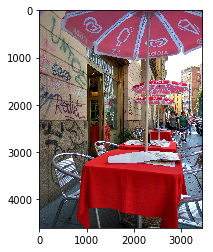

In [9]:
def crop_bitmap(bitmap: np.ndarray) -> np.ndarray:
    return bitmap[math.floor(bitmap.shape[0] % 8 / 2):bitmap.shape[0] - math.ceil(bitmap.shape[0] % 8 / 2),
                  math.floor(bitmap.shape[1] % 8 / 2):bitmap.shape[1] - math.ceil(bitmap.shape[1] % 8 / 2)]
crop_img = crop_bitmap(original_img_matrix)
show_matrix(crop_img, cmap='BGR')
crop_img.shape

### BGR to Y'CrCb

According to the explanation in the [README.md](README.md) file, we want to convert the **BGR**-formatted matrix to the **Y'CrCb** format (**RGB** and **Y'CbCr** are shown inverted in cv2).
We use a formula defined in the [cv2 documentation](https://docs.opencv.org/3.2.0/de/d25/imgproc_color_conversions.html):

\begin{equation*}
\mathbf{RGB \rightarrow Y'CbCr} \\
Y = 0.299 \cdot R + 0.587 \cdot G + 0.114 \cdot B \\
Cr = (R-Y) \cdot 0.713 + 128 \\
Cb = (B-Y) \cdot 0.564 + 128
\end{equation*}


\begin{equation*}
\mathbf{Y'CrCb \rightarrow BGR} \\
R = Y + 1.403 \cdot (Cr - 128) \\
G = Y - 0.714 \cdot (Cr - 128) - 0.344 \cdot (Cb - 128) \\
B = Y + 1.773 \cdot (Cb - 128)
\end{equation*}

In [10]:
from typing import List

def bgr_pixel_to_ycrcb(bgr: list) -> List[int]:
    return [
        round(0.299 * bgr[2] + 0.587 * bgr[1] + 0.114 * bgr[0]),  # Y'
        round((bgr[2] - round((0.299 * bgr[2] + 0.587 * bgr[1] + 0.114 * bgr[0]))) * 0.713 + 128),  # Cr
        round((bgr[0] - round((0.299 * bgr[2] + 0.587 * bgr[1] + 0.114 * bgr[0]))) * 0.564 + 128)  # Cb
    ]

def ycrcb_pixel_to_bgr(ycrcb: list) -> List[int]:
    return [
        round(ycrcb[0] + 1.773 * (ycrcb[2] - 128)),  # B
        round(ycrcb[0] - 0.714 * (ycrcb[1] - 128) - 0.344 * (ycrcb[2] - 128)),  # G
        round(ycrcb[0] + 1.403 * (ycrcb[1] - 128))  # R
    ]

def bgr_to_ycrcb(matrix3d: np.ndarray) -> np.ndarray:
    return np.apply_along_axis(bgr_pixel_to_ycrcb, 2, matrix3d)

def ycrcb_to_bgr(matrix3d: np.ndarray) -> np.ndarray:
    return np.apply_along_axis(ycrcb_pixel_to_bgr, 2, matrix3d).clip(0, 255).astype(np.uint8)

img_ycrcb = bgr_to_ycrcb(crop_img)
print("BGR:")
print(crop_img[1,1])
print("Y'CrCb:")
print(img_ycrcb[1,1])

BGR:
[142  96  89]
Y'CrCb:
[ 99. 121. 152.]


To display an image in **Y'CrCb** we will need to convert the image back to **BGR**.

In [11]:
show_matrix(ycrcb_to_bgr(img_ycrcb), cmap='BGR')

MemoryError: 

### Split Colors

In the compression process we work on each color separately.

In [ ]:
def split_to_three_colors(matrix: np.ndarray) -> List[np.ndarray]:
    return [
        matrix[..., 0],
        matrix[..., 1],
        matrix[..., 2]
    ]
y, cr, cb = split_to_three_colors(img_ycrcb)
[y[1,1], cr[1,1], cb[1,1]] == img_ycrcb[1,1]

### Downsapling

Because the human eye is more sensitive to Y diversity than to Cr and Cb, we can damage the rate of change of Cr and Cb colors and damage very little image appearance.

We do this at 4:2:0, so every 4 pixels gets the value of the top left pixel. So we left only a quarter of the information for Cb and Cr values.

We did this by taking each second row and second column from the matrix.

In [ ]:
def downsample(matrix: np.ndarray):
    return matrix[::2, ::2]


def upsample(matrix: np.ndarray) -> np.ndarray:
    return matrix.repeat(2, axis=0).repeat(2, axis=1)

cr_downsample = downsample(cr)
cb_downsample = downsample(cb)
print(cr.shape)
print(cr_downsample.shape)

### Splitting into 8x8 submatrices

We perform the DCT transformation on 8x8 matrices, to obtain a vector in dimension 64.

In [ ]:
def split_matrix_into_sub_matrices(matrix: np.ndarray) -> List[np.ndarray]:
    return [
        np.array([
            [
                matrix[row_index][col_index]
                for col_index in range(col, min(col + 8, len(matrix[0])))
            ]  # row in matrix
            for row_index in range(row, min(row + 8, len(matrix)))
        ])  # 8*8 matrix
        for row in range(0, len(matrix), 8)
        for col in range(0, len(matrix[0]), 8)
    ]

y_split = split_matrix_into_sub_matrices(y)
cr_split = split_matrix_into_sub_matrices(cr_downsample)
cb_split = split_matrix_into_sub_matrices(cb_downsample)
print(y_split[1].shape)
print(cr_split[1].shape)
print(cb_split[1].shape)

### Discrete Cosine Transform (DCT)

We use a formula that combines the vectors that spread the 64-dimensional space, multiplied by our matrix to get the scalar of the linear combination.

You can look at the [explanatory file](DCT Formula Hebrew.pdf) (if you read Hebrew).

From [Wikipedia](https://en.wikipedia.org/wiki/JPEG#Discrete_cosine_transform):

\begin{equation*}
\ G_{u,v}={\frac {1}{4}}\alpha (u)\alpha (v)\sum _{x=0}^{7}\sum _{y=0}^{7}g_{x,y}\cos \left[{\frac {(2x+1)u\pi }{16}}\right]\cos \left[{\frac {(2y+1)v\pi }{16}}\right]
\end{equation*}

where:

* $ u $ is the horizontal spatial frequency, for the integers $ 0\leq u<8 $.
* $ v $ is the vertical spatial frequency, for the integers $ 0\leq v<8 $.
* $ \alpha (u)={\begin{cases}{\frac {1}{\sqrt {2}}},&{\mbox{if }}u=0\\1,&{\mbox{otherwise}}\end{cases}} $ is a normalizing scale factor to make the transformation orthonormal
* $ g_{x,y} $ is the pixel value at coordinates $ (x,y) $
* $ G_{u,v} $ is the DCT coefficient at coordinates $ (u,v) $.

Before performing the transformation we normalize the values from 0-255 to 128-127.

In [ ]:
def normalize_to_zero(matrix: np.ndarray) -> np.ndarray:
    return matrix - 128

def cos_element(x, u):
    return math.cos((2 * x + 1) * u * math.pi / 16)

def alpha(u):
    return 1 / math.sqrt(2) if u == 0 else 1

def g_uv(u, v, matrix):
    return (1 / 4) * alpha(u) * alpha(v) * sum(
        matrix[x][y] * cos_element(x, u) * cos_element(y, v)
        for x in range(len(matrix))
        for y in range(len(matrix[0])))

def discrete_cosine_transform(matrix: np.ndarray) -> np.ndarray:
    return np.array([[g_uv(y, x, matrix)
                      for x in range(len(matrix[y]))]
                     for y in range(len(matrix))])

def dct(matrix: np.ndarray) -> np.ndarray:
    return discrete_cosine_transform(normalize_to_zero(matrix))

y_dct = [dct(sub_matrix) for sub_matrix in y_split]
cr_dct = [dct(sub_matrix) for sub_matrix in cr_split]
cb_dct = [dct(sub_matrix) for sub_matrix in cb_split]

### Quantization

Here the magic happens. We have a fixed 8x8 matrix, which has been researched and tested and found to be the most suitable. Each element in the DCT matrix we received is divided with the corresponding element in the regular matrix. You can see that the numbers in the matrix are increasing according to their index.

After we divide, the values in the higher indexes will be lower. Most values will be between 0-1, and when we round them down they will be 0.

In [ ]:
quantization_matrix = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]
])
def quantization(submatrix: np.ndarray) -> np.ndarray:
    return np.array([[round(submatrix[row, col] / quantization_matrix[row, col])
                      for col in range(len(submatrix[row]))]
                     for row in range(len(submatrix))])

y_quantization = [quantization(submatrix) for submatrix in y_dct]
cb_quantization = [quantization(submatrix) for submatrix in cb_dct]
cr_quantization = [quantization(submatrix) for submatrix in cr_dct]

y_quantization[1]

### Entropy

At this point we can compress by frequency compression, Hoffman for example.

The values are now in a much more limited range, and as a result they will repeat themselves more. In addition, many of the values are 0.

In [ ]:
entropy(np.dstack([np.dstack(y_quantization), np.dstack(cb_quantization), np.dstack(cr_quantization)]))